In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Overwrite ****** matplotlib defaults
import seaborn as sns
import matplotlib.pyplot as plt
cm = 0.393701

plt.rcParams['svg.fonttype']='none'
plt.rcParams['pdf.fonttype']=42
plt.rcParams['font.family'] = 'Arial'

plt.rcParams['figure.dpi'] = '300'

cm = 1/2.54  # centimeters in inches
# allows specifying matplotlib sizes in cm
plt.rcParams['lines.linewidth'] = 0.8
plt.rcParams['axes.linewidth'] = 0.8
plt.rcParams['figure.figsize'] = [5*cm, 4.5*cm]

plt.rcParams["font.size"] = 6

plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['xtick.minor.width'] = 0.4
plt.rcParams['ytick.major.width'] = 0.8
plt.rcParams['ytick.minor.width'] = 0.4
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.minor.size'] = 1

In [11]:
tmp = pd.read_csv('data/cellprofiler_RNA-FISH/cellprofiler_Nuclei_speckles.csv')
mapper = {467: 'humanSON', 456: 'SON^C', 458: 'SON^C-RSRP', 459: 'SON^C-RSRP-NEG', 468: 'SON^delC', 470: 'flySON', 623: 'fishSON'}
order = mapper.values()
tmp['Construct'] = tmp['Metadata_group'].map(mapper)
tmp = tmp[tmp['Mean_RNAspeckles_AreaShape_Area']<800]
tmp = tmp[tmp['AreaShape_Compactness']<2]

tmp.head()

,ImageNumber,ObjectNumber,Metadata_FileLocation,Metadata_Frame,Metadata_Series,Metadata_group,Metadata_group.1,FileName_DNA,FileName_exoSON,FileName_mRNA,...,Mean_SONspeckles_Location_MaxIntensity_Z_DNA,Mean_SONspeckles_Location_MaxIntensity_Z_DNA.1,Mean_SONspeckles_Location_MaxIntensity_Z_exoSON,Mean_SONspeckles_Location_MaxIntensity_Z_exoSON.1,Mean_SONspeckles_Location_MaxIntensity_Z_mRNA,Mean_SONspeckles_Location_MaxIntensity_Z_mRNA.1,Mean_SONspeckles_Number_Object_Number,Number_Object_Number,Parent_Nuclei,Construct
0,1,1,NaN,0,0,456,456,C1-456_001.tif,C2-456_001.tif,C3-456_001.tif,...,0.0,0.0,0.0,0.0,0.0,0.0,1.00,1,1,SON^C
1,1,2,NaN,0,0,456,456,C1-456_001.tif,C2-456_001.tif,C3-456_001.tif,...,0.0,0.0,0.0,0.0,0.0,0.0,2.50,2,2,SON^C
2,1,3,NaN,0,0,456,456,C1-456_001.tif,C2-456_001.tif,C3-456_001.tif,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,SON^C
3,1,4,NaN,0,0,456,456,C1-456_001.tif,C2-456_001.tif,C3-456_001.tif,...,0.0,0.0,0.0,0.0,0.0,0.0,6.50,4,4,SON^C
4,1,5,NaN,0,0,456,456,C1-456_001.tif,C2-456_001.tif,C3-456_001.tif,...,0.0,0.0,0.0,0.0,0.0,0.0,11.75,5,5,SON^C


In [4]:
tmp.groupby('Construct').Mean_RNAspeckles_AreaShape_Eccentricity.median()

Construct
SON^C             0.722756
SON^C-RSRP        0.785699
SON^C-RSRP-NEG    0.810436
SON^delC          0.769340
fishSON           0.734552
flySON            0.714137
humanSON          0.772734
Name: Mean_RNAspeckles_AreaShape_Eccentricity, dtype: float64

In [12]:
wt = pd.read_csv('data/cellprofiler_RNA-FISH/cellprofilerWT_Nuclei.csv')
wt['Construct'] = wt['Metadata_group']
df = pd.concat([wt, tmp]).copy()
df.reset_index(inplace=True)
df.head()

,index,ImageNumber,ObjectNumber,Metadata_FileLocation,Metadata_Frame,Metadata_Series,Metadata_group,Metadata_group.1,FileName_DNA,FileName_exoSON,...,Mean_SONspeckles_Location_MaxIntensity_Z_DNA.1,Mean_SONspeckles_Location_MaxIntensity_Z_exoSON,Mean_SONspeckles_Location_MaxIntensity_Z_exoSON.1,Mean_SONspeckles_Location_MaxIntensity_Z_mRNA,Mean_SONspeckles_Location_MaxIntensity_Z_mRNA.1,Mean_SONspeckles_Number_Object_Number,Number_Object_Number,Parent_bigNuclei,Construct,Parent_Nuclei
0,0,1,1,NaN,0,0,WT_control,WT_control,C1-WT_control.tif,C2-WT_control.tif,...,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,WT_control,NaN
1,1,1,2,NaN,0,0,WT_control,WT_control,C1-WT_control.tif,C2-WT_control.tif,...,NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,WT_control,NaN
2,2,1,3,NaN,0,0,WT_control,WT_control,C1-WT_control.tif,C2-WT_control.tif,...,0.0,0.0,0.0,0.0,0.0,4.0,3,3.0,WT_control,NaN
3,3,1,4,NaN,0,0,WT_control,WT_control,C1-WT_control.tif,C2-WT_control.tif,...,0.0,0.0,0.0,0.0,0.0,3.0,4,4.0,WT_control,NaN
4,4,1,5,NaN,0,0,WT_control,WT_control,C1-WT_control.tif,C2-WT_control.tif,...,0.0,0.0,0.0,0.0,0.0,2.0,5,5.0,WT_control,NaN


In [6]:
medians = df.groupby('Construct').Mean_RNAspeckles_AreaShape_Eccentricity.median()
medians

Construct
SON^C             0.722756
SON^C-RSRP        0.785699
SON^C-RSRP-NEG    0.810436
SON^delC          0.769340
WT_control        0.771392
WT_siSON          0.734579
fishSON           0.734552
flySON            0.714137
humanSON          0.772734
Name: Mean_RNAspeckles_AreaShape_Eccentricity, dtype: float64

In [7]:
order = ['WT_control', 'WT_siSON'] + list(mapper.values())
pairs = [('WT_control', x) for x in order if x != 'WT_control']
pairs

[('WT_control', 'WT_siSON'),
 ('WT_control', 'humanSON'),
 ('WT_control', 'SON^C'),
 ('WT_control', 'SON^C-RSRP'),
 ('WT_control', 'SON^C-RSRP-NEG'),
 ('WT_control', 'SON^delC'),
 ('WT_control', 'flySON'),
 ('WT_control', 'fishSON')]

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WT_control vs. WT_siSON: Mann-Whitney-Wilcoxon test two-sided, P_val:5.782e-03 U_stat=1.559e+03
WT_control vs. humanSON: Mann-Whitney-Wilcoxon test two-sided, P_val:5.133e-01 U_stat=3.168e+03
WT_control vs. SON^C: Mann-Whitney-Wilcoxon test two-sided, P_val:7.309e-06 U_stat=3.926e+03
WT_control vs. SON^C-RSRP: Mann-Whitney-Wilcoxon test two-sided, P_val:7.979e-01 U_stat=6.611e+03
WT_control vs. SON^C-RSRP-NEG: Mann-Whitney-Wilcoxon test two-sided, P_val:2.147e-02 U_stat=3.347e+03
WT_control vs. SON^delC: Mann-Whitney-Wilcoxon test two-sided, P_val:2.280e-01 U_stat=4.625e+03
WT_control vs. flySON: Mann-Whitney-Wilcoxon test two-sided, P_val:3.467e-06 U_stat=6.205e+03
WT_control vs. fishSON: Mann-Whitney-Wilcoxon test two-sided, P_val:3.703e-05 U_stat=4.282e+03


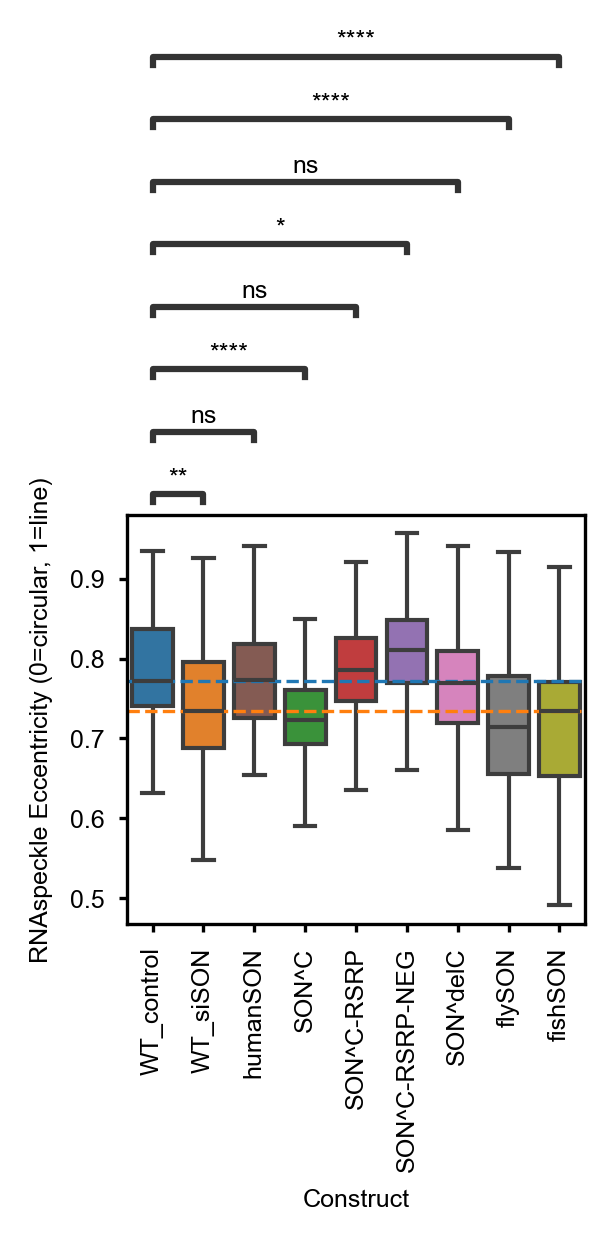

In [9]:
from statannotations.Annotator import Annotator

ax = sns.boxplot(data=df, x='Construct', y='Mean_RNAspeckles_AreaShape_Eccentricity',
            order=order, showfliers=False, hue='Construct')
annotator = Annotator(ax, pairs, data=df, x='Construct', y='Mean_RNAspeckles_AreaShape_Eccentricity', order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

plt.ylabel('RNAspeckle Eccentricity (0=circular, 1=line)')
plt.xticks(rotation=90)
plt.axhline(y=medians.WT_control, color=sns.color_palette()[0], linestyle='--')
plt.axhline(y=medians.WT_siSON, color=sns.color_palette()[1], linestyle='--')
